<img src="notchSchematic.png" width="50%">

$$\frac{V_o}{V_i} = \frac{(\frac{1}{j \omega C} + R_l + j \omega L)}{R_s + (\frac{1}{j \omega C} + R_l + j \omega L)}$$

$$at resonance,$$

$$ \left|\frac{1}{j \omega C}\right| = \left|j \omega L\right|$$

$$\omega = \frac{1}{\sqrt{L C}}$$

$$L = \frac{1}{\omega^2  C}, \omega = 2 \pi f$$

$$L = \frac{1}{(2 \pi f)^2 C}$$

Expect  Voutmin=0.0370 at 159.15Hz
Calculated Vout=0.0370 at 159.07Hz


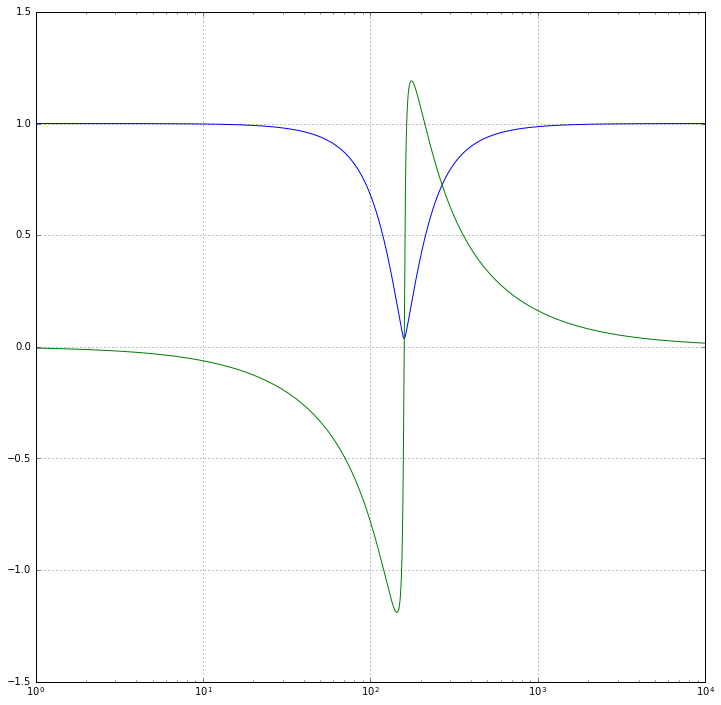

In [75]:
%matplotlib inline

from cmath import phase, pi
from math import degrees,sqrt
import matplotlib.pyplot as plt

Rs = 10000
C  = 0.1e-6
L  = 10
Rl = 384
plotpoints = 5000

def Vo(f, Vi = 1):
    RLC = 1/(2*pi*f*C*1j) + Rl + (2*pi*f*L*1j)
    return Vin * (RLC/(Rs+RLC))
    
frequencies = [ pow(10,4.0*i/plotpoints) for i in range(plotpoints)]
mags = []
phases = []

fmin = 1
magmin = 2

for f in frequencies:
    vout = Vout(f)
    mag = abs(vout)
    mags.append(mag)
    phases.append(phase(vout))
    if mag < magmin:
        fmin = f
        magmin = mag

print "Expect  Voutmin=%0.4f at %.2fHz"%(float(Rl)/(Rl+Rs),1/(2*pi*sqrt(L*C)))
print "Calculated Vout=%0.4f at %.2fHz"%(magmin,fmin)
        
plt.figure()
plt.figure(figsize=(12, 12))
plt.semilogx(frequencies,mags)
plt.semilogx(frequencies,phases)
plt.grid(True)
plt.show()


